In [126]:
import pandas as pd
import numpy as np
from csv import reader
import matplotlib.pyplot as plt
import seaborn as sns
import os
import string
import re
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
from nltk.corpus import stopwords 


In [127]:
data = pd.read_csv('Amazon_Review_Feedback_Updated.csv',encoding='latin-1')
# print data records
data.head()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful


In [128]:
# print various attributes available in the dataset
data.columns

Index(['Review Title', 'Customer name', 'Rating', 'Date', 'Category',
       'Comments', 'Useful'],
      dtype='object')

In [129]:
# print properties of attributes in the dataset
data.info

<bound method DataFrame.info of                                            Review Title  \
0          Another Midrange killer Smartphone by Xiaomi   
1                                 vry small size mobile   
2          Full display not working in all application.   
3                                       Value for Money   
4                               Not worth for the money   
...                                                 ...   
1115  Cemera quality,face unlock most important in t...   
1116                                   Mi is best phone   
1117                                     Its a OK Phone   
1118                                              Redmi   
1119                           Not worth for the price.   

                 Customer name              Rating                  Date  \
0            Rishikumar Thakur  4.0 out of 5 stars     on 1 October 2018   
1                      Raza ji  3.0 out of 5 stars  on 15 September 2018   
2                Vaibhav Patel 

In [132]:
print ("Data rows before removing null values",data.shape[0])

Data rows before removing null values 1120


In [133]:
# check the number of null values per column
print(data.isnull().sum())

Review Title       0
Customer name      0
Rating             0
Date               0
Category           0
Comments           0
Useful           680
dtype: int64


In [99]:
# replace null values with nan
#data.replace('',np.nan,inplace=True)

In [8]:
# drop nan values in the data
#data.dropna(axis=0, how='any', inplace=True)

In [134]:
# check the number of null values per column replacing with nan and dropping nan
print(data.isnull().sum())

Review Title       0
Customer name      0
Rating             0
Date               0
Category           0
Comments           0
Useful           680
dtype: int64


In [135]:
print ("Data rows after removing null values",data.shape[0])

Data rows after removing null values 1120


In [136]:
# adding a sentiment column to classify reviews as Positive or Negative

data['sentiment'] = np.where(data['Rating'] == '5.0 out of 5 stars', 1,
                           np.where(data['Rating'] == '4.0 out of 5 stars', 1, 0))


In [137]:
# export the data frame to a .csv file
#data.to_csv (r'amazon_electronics.csv', index = False, header=True)

# get unique values of product title column
data["Category"].unique()

array(['Display', 'Others', 'Camera', 'Battery', 'Delivery'], dtype=object)

In [138]:
# choose a particular product for analysis
prod_hosa = data.loc[data["Category"]=='Others']
prod_hosa

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,sentiment
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,0
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,0
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,0
8,Good,Amazon Customer,5.0 out of 5 stars,on 15 September 2018,Others,Wooo,5 people found this helpful,1
9,All youtubers are paid,Sharad,5.0 out of 5 stars,on 22 September 2018,Others,Realme is sub brand of oppo\nHe give money to ...,2 people found this helpful,1
...,...,...,...,...,...,...,...,...
1107,Heating issues and battery is not upto the mark.,anoop vp,1.0 out of 5 stars,on 24 September 2018,Others,Phone has heating issue. Amazon return policy ...,,0
1109,Value for money,Amazon Customer,5.0 out of 5 stars,on 15 September 2018,Others,Best value for money,,1
1115,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,"I like This Phone, Awesome look and design.\nI...",NaN,1
1116,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,Product is avasome but invoice is note include...,NaN,1


In [139]:
data.head()

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,sentiment
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,,1
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,0
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,0
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful,1
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,0


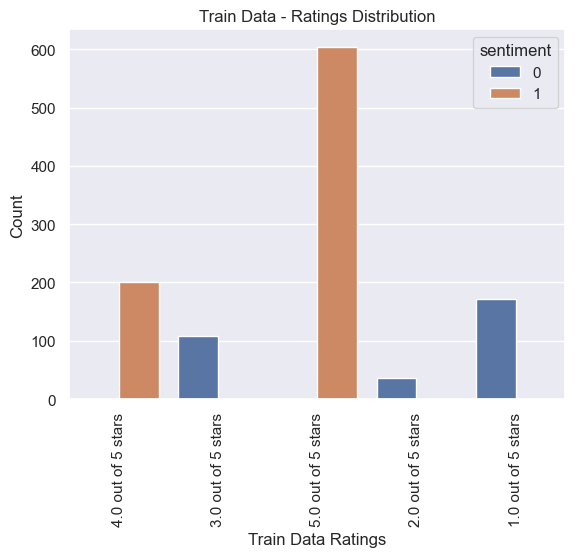

In [140]:
ax=sns.barplot(x='Rating', y=data['Rating'].groupby(data['Rating']).transform('count'), data=data, hue='sentiment')
plt.xlabel('Train Data Ratings')
plt.ylabel('Count')
plt.title('Train Data - Ratings Distribution')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

In [141]:
# function to remove html elements from the reviews
def removeHTML(raw_text):
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text() 
    return clean_HTML

In [142]:
# function to remove special characters and numbers from the reviews4961
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)  
    return clean_SpecialChar

In [143]:
# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase))  

In [144]:
# function to remove stop words from the reviews
def removeStopWords(raw_text):
    stops = set(stopwords.words("english"))
    words = [w for w in raw_text if not w in stops]
    return(words)

In [145]:
# #split data-set to train and test

#X = prod_hosa['Comments']
#Y = prod_hosa['sentiment']

#data.head()

X = data['Comments']
Y = data['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)
print(X_train,X_test,Y_train,Y_test)

# X_training clean set
X_train_cleaned = []

for val in X_train:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val) 
    X_train_cleaned.append(val) 
    
# X_testing clean set
X_test_cleaned = []

for val in X_test:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val)
    X_test_cleaned.append(val) 
    
X_train.head()
print(X_train,X_test)

184                                                  Nice
712                                          Nice product
486                                                  Good
260     the camera is good, phone is fast overall work...
398     Front camera low hai cost jyada hair 9999 take...
                              ...                        
466                                                  Good
121                                  Low pictures clarity
1044                                                 Nice
1095    excellent this redmi 6 Pro so nice product of ...
860                         awesome product at this range
Name: Comments, Length: 896, dtype: object 243     Overall Phone seems to be good with performanc...
101          One of best mobile compare to nokia 6 1 plus
963                                          Good quality
1061    Phone is really nice and good looking.\nI thin...
522     Best phone with face unlock full hd video reco...
                             

C:\Users\BokkaBhagyaSree\AppData\Local\Temp\ipykernel_2148\3357511827.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text()


184                                                  Nice
712                                          Nice product
486                                                  Good
260     the camera is good, phone is fast overall work...
398     Front camera low hai cost jyada hair 9999 take...
                              ...                        
466                                                  Good
121                                  Low pictures clarity
1044                                                 Nice
1095    excellent this redmi 6 Pro so nice product of ...
860                         awesome product at this range
Name: Comments, Length: 896, dtype: object 243     Overall Phone seems to be good with performanc...
101          One of best mobile compare to nokia 6 1 plus
963                                          Good quality
1061    Phone is really nice and good looking.\nI thin...
522     Best phone with face unlock full hd video reco...
                             

In [146]:

total = len(data)
train_len = int(total*0.75)
test_len = int(total*0.15)
train_df = data.iloc[0:train_len]
test_df = data.iloc[train_len: (train_len + test_len)]
val_df = data.iloc[(train_len + test_len):total]

# Optionally, you can reset the index of each dataset
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

print(train_len,test_len,(train_len + test_len),total)
print("Train:",len(train_df))
print("Test:",len(test_df))
print("Val:",len(val_df))

#train_df = pd.DataFrame(docSentimentList,columns=['Text','Sentiment'])
train_df.head()
train_df_specific = pd.DataFrame(train_df,columns=['Comments','sentiment'])
train_df_specific.head()

840 168 1008 1120
Train: 840
Test: 168
Val: 112


,Comments,sentiment
0,Another Midrange killer Smartphone by Xiaomi\n...,1
1,All ok but vry small size mobile,0
2,Quite good,0
3,Redmi has always have been the the king of bud...,1
4,worst product from MI. I am a hardcore fan of ...,0


In [147]:
train_df_specific.head()
#val_df.head()

,Comments,sentiment
0,Another Midrange killer Smartphone by Xiaomi\n...,1
1,All ok but vry small size mobile,0
2,Quite good,0
3,Redmi has always have been the the king of bud...,1
4,worst product from MI. I am a hardcore fan of ...,0


In [148]:
train_df_specific.groupby('sentiment').describe()

Comments                                                            \
             count unique                                                top   
sentiment                                                                      
0              237     61  Please don't buy these product.. I have 3-mobi...   
1              603    156                                               Good   

                
          freq  
sentiment       
0            9  
1           54

In [149]:
train_df_specific['length'] = train_df_specific['Comments'].apply(len)
train_df_specific.head()
train_df_specific.iloc[:1]

,Comments,sentiment,length
0,Another Midrange killer Smartphone by Xiaomi\n...,1,4577


<Axes: xlabel='sentiment', ylabel='count'>

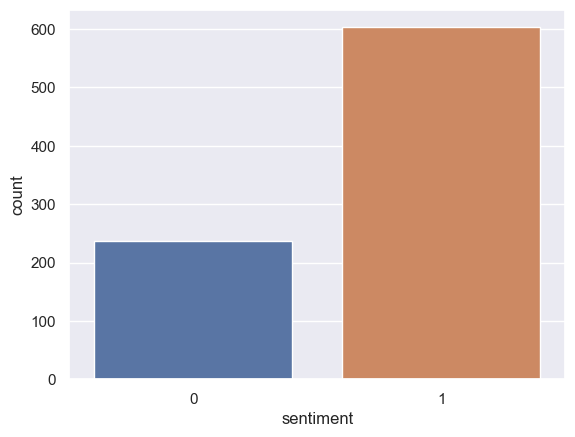

In [150]:
#import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="sentiment", data=train_df_specific)

In [151]:
train_df_specific.length.describe()

count     840.000000
mean      151.675000
std       474.313815
min         2.000000
25%        11.000000
50%        34.000000
75%        92.750000
max      4577.000000
Name: length, dtype: float64

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

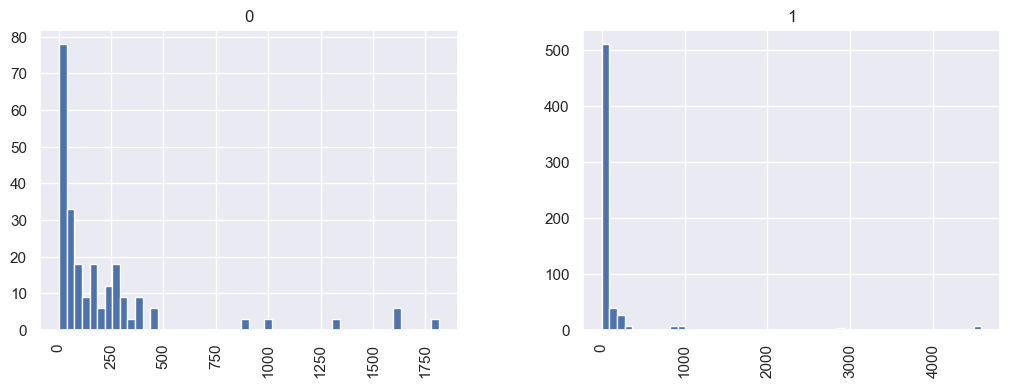

In [153]:
train_df_specific.hist(column='length', by='sentiment', bins=50,figsize=(12,4))

In [154]:
train_df_specific['sentiment'][train_df_specific['sentiment']=='1'] = 0
train_df_specific['sentiment'][train_df_specific['sentiment']=='2'] = 1

C:\Users\BokkaBhagyaSree\AppData\Local\Temp\ipykernel_2148\1230441349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_specific['sentiment'][train_df_specific['sentiment']=='1'] = 0
C:\Users\BokkaBhagyaSree\AppData\Local\Temp\ipykernel_2148\1230441349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_specific['sentiment'][train_df_specific['sentiment']=='2'] = 1


In [156]:
train_df_specific['sentiment'].value_counts()

sentiment
1    603
0    237
Name: count, dtype: int64

In [157]:
train_df_specific['word_count'] = train_df_specific['Comments'].str.lower().str.split().apply(len)
train_df_specific.head()

,Comments,sentiment,length,word_count
0,Another Midrange killer Smartphone by Xiaomi\n...,1,4577,837
1,All ok but vry small size mobile,0,32,7
2,Quite good,0,10,2
3,Redmi has always have been the the king of bud...,1,843,146
4,worst product from MI. I am a hardcore fan of ...,0,84,16


In [158]:
import string 
def remove_punc(s):
    table = str.maketrans({key: None for key in string.punctuation})
    return s.translate(table)

In [159]:
#!pip install contractions
import contractions

def expand_contractions(text):
    if isinstance(text, str):
        # If input is a string, apply contractions.fix directly
        expanded_text = contractions.fix(text)
    elif isinstance(text, pd.Series):
        # If input is a Series, apply contractions.fix to each element
        expanded_text = text.apply(contractions.fix)
    return expanded_text

# Example usage:
#text_with_contractions = "all ok isn't but vry small size mobile"
#expanded_text = expand_contractions(text_with_contractions)
#print("Original text:", text_with_contractions)
#print("Expanded text:", expanded_text)
train_df_specific['Comments'] = train_df_specific['Comments'].apply(expand_contractions)
print(train_df_specific)

                                              Comments  sentiment  length  \
0    Another Midrange killer Smartphone by Xiaomi\n...          1    4577   
1                     All ok but vry small size mobile          0      32   
2                                           Quite good          0      10   
3    Redmi has always have been the the king of bud...          1     843   
4    worst product from MI. I am a hardcore fan of ...          0      84   
..                                                 ...        ...     ...   
835  I like This Phone, Awesome look and design.\nI...          1      64   
836  Product is avasome but invoice is note include...          1      52   
837  Redmi Note4, Note5, now 6pro..It seems the old...          0     990   
838                                          I love mi          1       9   
839  Same old configurations with higher price.\nNo...          0     332   

     word_count  
0           837  
1             7  
2             2  
3  

In [ ]:
#!pip install textblob
from textblob import TextBlob

def correct_spelling(text):
    blob = TextBlob(text)
    corrected_text = blob.correct()
    return str(corrected_text)

#Example usage:
#text_with_typos = "all ok isn't but vry small size mobile"
#corrected_text = correct_spelling(text_with_typos)
#print("Original text:", text_with_typos)
#print("Corrected text:", corrected_text)
#print(train_df_specific)
print("abc")
train_df_specific['Comments'] = train_df_specific['Comments'].apply(correct_spelling)
print("def")
print(train_df_specific)


abc


In [66]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text.split()]
    return ' '.join(lemmatized_words)

# Example usage:
text = "cats are running and jumping"
lemmatized_text = lemmatize_text(text)
print("Original text:", text)
print("Lemmatized text:", lemmatized_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BokkaBhagyaSree\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original text: cats are running and jumping
Lemmatized text: cat are running and jumping


In [67]:
from nltk.tokenize import word_tokenize

# Download NLTK resources (run only once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def pos_tagging(sentence):
    tokens = word_tokenize(sentence)  # Tokenize the sentence into words
    tagged_tokens = nltk.pos_tag(tokens)  # Perform POS tagging
    return tagged_tokens

# Example usage
sentence = "This is a sample sentence for POS tagging."
pos_tags = pos_tagging(sentence)
print(pos_tags)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BokkaBhagyaSree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BokkaBhagyaSree\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('sample', 'JJ'), ('sentence', 'NN'), ('for', 'IN'), ('POS', 'NNP'), ('tagging', 'NN'), ('.', '.')]


In [34]:
print(train_df_specific)
train_df_specific['Comments'] = train_df_specific['Comments'].apply(expand_contractions)
print(train_df_specific)
train_df_specific['Comments'] = train_df_specific['Comments'].apply(remove_punc)
train_df_specific['Comments'] = train_df_specific['Comments'].apply(removeHTML)
train_df_specific['Comments'] = train_df_specific['Comments'].apply(removeSpecialChar)
train_df_specific['Comments'] = train_df_specific['Comments'].apply(toLowerCase)
train_df_specific['Comments'] = train_df_specific['Comments'].apply(lemmatize_text)

train_df_specific.shape

                                              Comments  sentiment  length  \
0    Another Midrange killer Smartphone by Xiaomi\n...          1    4577   
1                    All ok but very small size mobile          0      32   
2                                           Quite good          0      10   
3    Semi has always have been the the king of budg...          1     843   
4    worst product from of. I am a hardware fan of ...          0      84   
..                                                 ...        ...     ...   
835  I like His Shone, Awesome look and design.\nI ...          1      64   
836  Product is avasome but voice is note include.....          1      52   
837  Semi Note, Note, now pro..It seems the older t...          0     990   
838                                          I love mi          1       9   
839  Same old configuration with higher price.\nNot...          0     332   

     word_count  
0           837  
1             7  
2             2  
3  

(840, 4)

In [68]:
train_df_specific.head()

,Comments,sentiment,length,word_count
0,Another Midrange killer Smartphone by Xiaomi\n...,1,4577,837
1,All ok but vry small size mobile,0,32,7
2,Quite good,0,10,2
3,Redmi has always have been the the king of bud...,1,843,146
4,worst product from MI. I am a hardcore fan of ...,0,84,16


In [69]:
train_df['sentiment'].value_counts()

sentiment
1    603
0    237
Name: count, dtype: int64

In [70]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
st_wd = text.ENGLISH_STOP_WORDS
c_vector = CountVectorizer(stop_words = st_wd,min_df=.0001,lowercase=1)
#c_vector.fit(train_df1['Comments'].values)
#word_list = list(c_vector.vocabulary_.keys())
stop_words = list(c_vector.stop_words) 
print(stop_words)

['due', 'further', 'of', 'everyone', 'bill', 'its', 'itself', 'eleven', 'somehow', 'cry', 'something', 'hundred', 'they', 'thence', 'cannot', 'becoming', 'whence', 'himself', 'do', 'their', 'fifteen', 'which', 'sincere', 'about', 'few', 'we', 'and', 'thereafter', 'everywhere', 'hereby', 'under', 'behind', 'into', 'three', 'become', 'least', 'serious', 'can', 'whose', 'former', 'besides', 'anything', 'always', 'it', 'might', 'some', 'a', 'were', 'there', 'them', 'as', 'beyond', 'here', 'most', 'fill', 'sometimes', 'each', 'that', 'never', 'am', 'noone', 'however', 'seeming', 'same', 'this', 'already', 'see', 'well', 'myself', 'beforehand', 'several', 'four', 'from', 'both', 'couldnt', 'again', 'five', 'all', 'to', 'hers', 'more', 'against', 'too', 'through', 'around', 'anyone', 'fifty', 'on', 'my', 'us', 'with', 'thick', 'thereupon', 'get', 'why', 'made', 'somewhere', 'amongst', 'was', 'though', 'seemed', 'you', 'so', 'other', 'system', 'without', 'back', 'for', 'name', 'almost', 'seem'

In [71]:
from nltk.tokenize import word_tokenize

# Download NLTK resources (run only once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def pos_tagging(sentence):
    tokens = word_tokenize(sentence)  # Tokenize the sentence into words
    tagged_tokens = nltk.pos_tag(tokens)  # Perform POS tagging
    return tagged_tokens

def reviewEdit(raw_sen_list,stop_words):
    sen_list = []
    for i in range(len(raw_sen_list)):
        raw_sen = pos_tagging(raw_sen_list[i])
        sen_list.append(removeStopWords(raw_sen))
    return sen_list


sen_list = reviewEdit(list(train_df['Comments']),stop_words)
print(sen_list)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BokkaBhagyaSree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\BokkaBhagyaSree\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[[('Another', 'DT'), ('Midrange', 'NNP'), ('killer', 'NN'), ('Smartphone', 'NN'), ('by', 'IN'), ('Xiaomi', 'NNP'), ('Major', 'NNP'), ('Highlights', 'NNS'), (':', ':'), ('\x95', 'VB'), ('The', 'DT'), ('Redmi', 'NNP'), ('6', 'CD'), ('Pro', 'NNP'), ('sports', 'NNS'), ('a', 'DT'), ('5.84-inch', 'JJ'), ('full-HD+', 'JJ'), ('display', 'NN'), ('with', 'IN'), ('a', 'DT'), ('notch', 'NN'), ('\x95', 'NN'), ('Powered', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('Qualcomm', 'NNP'), ('Snapdragon', 'NNP'), ('625', 'CD'), ('SoC', 'NNP'), ('\x95', 'VBD'), ('The', 'DT'), ('phone', 'NN'), ('is', 'VBZ'), ('priced', 'VBN'), ('at', 'IN'), ('Rs', 'NNP'), ('.', '.'), ('10,999', 'CD'), ('for', 'IN'), ('the', 'DT'), ('3GB', 'CD'), ('RAM', 'NNP'), ('variant', 'NN'), ('(', '('), ('Start', 'NNP'), ('Point', 'NNP'), (')', ')'), ('\x95', 'VBP'), ('Battery', 'NNP'), ('of', 'IN'), ('4000', 'CD'), ('mAh', 'NN'), ('and', 'CC'), ('its', 'PRP$'), ('Durability', 'NNP'), ('\x95', 'NNP'), ('The', 'DT'), ('Tripple', 'NNP'), ('Slo

In [72]:
from gensim.models import Word2Vec
wv_model = Word2Vec(sen_list,vector_size=100)

In [79]:
wv_model.wv.vectors.shape
print(sen_list)

[[('Another', 'DT'), ('Midrange', 'NNP'), ('killer', 'NN'), ('Smartphone', 'NN'), ('by', 'IN'), ('Xiaomi', 'NNP'), ('Major', 'NNP'), ('Highlights', 'NNS'), (':', ':'), ('\x95', 'VB'), ('The', 'DT'), ('Redmi', 'NNP'), ('6', 'CD'), ('Pro', 'NNP'), ('sports', 'NNS'), ('a', 'DT'), ('5.84-inch', 'JJ'), ('full-HD+', 'JJ'), ('display', 'NN'), ('with', 'IN'), ('a', 'DT'), ('notch', 'NN'), ('\x95', 'NN'), ('Powered', 'VBN'), ('by', 'IN'), ('the', 'DT'), ('Qualcomm', 'NNP'), ('Snapdragon', 'NNP'), ('625', 'CD'), ('SoC', 'NNP'), ('\x95', 'VBD'), ('The', 'DT'), ('phone', 'NN'), ('is', 'VBZ'), ('priced', 'VBN'), ('at', 'IN'), ('Rs', 'NNP'), ('.', '.'), ('10,999', 'CD'), ('for', 'IN'), ('the', 'DT'), ('3GB', 'CD'), ('RAM', 'NNP'), ('variant', 'NN'), ('(', '('), ('Start', 'NNP'), ('Point', 'NNP'), (')', ')'), ('\x95', 'VBP'), ('Battery', 'NNP'), ('of', 'IN'), ('4000', 'CD'), ('mAh', 'NN'), ('and', 'CC'), ('its', 'PRP$'), ('Durability', 'NNP'), ('\x95', 'NNP'), ('The', 'DT'), ('Tripple', 'NNP'), ('Slo

In [42]:
import numpy as np
def fun(sen_list,wv_model):
    word_set = set(wv_model.wv.index_to_key)
    X = np.zeros([len(sen_list),25,100])
    c = 0
    for sen in sen_list:
        nw=24
        for w in list(reversed(sen)):
            if w in word_set and nw>-25:
                #print(c,nw)
                X[c,nw] = wv_model.wv.get_vector(w)
                nw=nw-1
        c=c+1
    return X

In [43]:
X = fun(sen_list,wv_model)
print(X)

[[[-9.34193134e-02  9.58198607e-02  2.41281418e-03 ... -5.89963496e-02
    6.61477149e-02 -2.74066925e-02]
  [-2.57659674e-01  2.63452768e-01  1.83516592e-02 ... -1.36177212e-01
    1.55606255e-01 -7.52555653e-02]
  [-2.55750775e-01  2.29890808e-01  1.73358899e-02 ... -1.23638898e-01
    1.57714844e-01 -6.64193109e-02]
  ...
  [-5.00232518e-01  4.60189670e-01  3.22530232e-02 ... -2.62103498e-01
    3.00878018e-01 -1.24181584e-01]
  [-6.96525201e-02  6.58554360e-02  3.10401572e-03 ... -3.97409014e-02
    5.43686226e-02 -2.44317744e-02]
  [-3.19521397e-01  3.11930090e-01  2.57041138e-02 ... -1.67620167e-01
    2.02237472e-01 -8.38395357e-02]]

 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
    0.00000000e+00  0.00000000e+00]
  ...
  [-1.68353006e-01  1.4

In [44]:
from sklearn.model_selection import train_test_split
y = train_df['sentiment'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [45]:
X_train.shape

(798, 25, 100)

In [47]:
import keras.backend as K
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation,LSTM, SimpleRNN ,GRU , Bidirectional,Input ,Concatenate, Multiply,Lambda,Reshape
input_st  = Input(shape=(25,100))
lstm1 = Bidirectional(LSTM(200,input_shape=(25,100),activation='relu',return_sequences=True),merge_mode='mul')(input_st)
lstm2 = Bidirectional(GRU(1,input_shape=(25,100),activation='relu',return_sequences=True),merge_mode='mul')(lstm1)
print(lstm1.shape,' ',lstm2.shape)
lstm2 = Reshape((-1,))(lstm2)
lstm2 = Activation('sigmoid')(lstm2)
lstm2 = Reshape((-1,1))(lstm2)
mult = Multiply()([lstm1,lstm2])

add = Lambda(lambda x: K.sum(x,axis=1))(mult)
dense = Dense(100,activation='relu')(add)
output = Dense(1,activation='sigmoid')(dense)

model = Model(inputs=input_st, outputs=output)
print(model.summary())

(None, 25, 200)   (None, 25, 1)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 25, 100)]            0         []                            
                                                                                                  
 bidirectional_2 (Bidirecti  (None, 25, 200)              481600    ['input_2[0][0]']             
 onal)                                                                                            
                                                                                                  
 bidirectional_3 (Bidirecti  (None, 25, 1)                1218      ['bidirectional_2[0][0]']     
 onal)                                                                                            
                                                            

In [48]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train,y_train,validation_split=0.1,epochs=25, batch_size=512,callbacks=[early_stop])


Epoch 1/25


2/2 [==============================] - 8s 1s/step - loss: 0.6925 - accuracy: 0.3774 - val_loss: 0.6960 - val_accuracy: 0.5875
Epoch 2/25
2/2 [==============================] - 1s 385ms/step - loss: 0.6870 - accuracy: 0.6922 - val_loss: 0.7002 - val_accuracy: 0.6375
Epoch 3/25
2/2 [==============================] - 1s 308ms/step - loss: 0.6811 - accuracy: 0.7019 - val_loss: 0.6807 - val_accuracy: 0.6750
Epoch 4/25
2/2 [==============================] - 1s 312ms/step - loss: 0.6737 - accuracy: 0.7284 - val_loss: 0.6691 - val_accuracy: 0.7125
Epoch 5/25
2/2 [==============================] - 1s 286ms/step - loss: 0.6650 - accuracy: 0.7702 - val_loss: 0.6739 - val_accuracy: 0.6750
Epoch 6/25
2/2 [==============================] - 1s 354ms/step - loss: 0.6524 - accuracy: 0.7563 - val_loss: 0.6381 - val_accuracy: 0.7625
Epoch 7/25
2/2 [==============================] - 1s 314ms/step - loss: 0.6372 - accuracy: 0.7855 - val_loss: 0.6345 - val_accuracy: 0.7125
Epoch 8/25
2/2 [====

In [50]:
model.evaluate(X_test, y_test, batch_size=64)


1/1 [==============================] - 0s 40ms/step - loss: 0.4920 - accuracy: 0.8333


[0.49197688698768616, 0.8333333134651184]

In [52]:
model.evaluate(X_test, y_test, batch_size=64)
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

2/2 [==============================] - 0s 21ms/step - loss: 0.4920 - accuracy: 0.8333
Accuracy: 87.58%


In [158]:
model.evaluate(X_train, y_train, batch_size=1024)

1/1 [==============================] - 0s 166ms/step - loss: 0.6191 - accuracy: 0.7607


[0.6191089749336243, 0.7606516480445862]

In [53]:
model.evaluate(X_train, y_train, batch_size=1024)
scores = model.evaluate(X_train, y_train)
print("Train acc: %.2f%%" % (scores[1]*100))


25/25 [==============================] - 1s 35ms/step - loss: 0.5431 - accuracy: 0.7456
Train acc: 87.58%


In [160]:
prob_test = model.predict(X_test).reshape((-1,))
pred_test = np.array([1 if y>0.5 else 0 for y in prob_test])
y_test = y_test.astype('int')
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

2/2 [==============================] - 1s 17ms/step
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.88      0.90      0.89        31

    accuracy                           0.83        42
   macro avg       0.79      0.77      0.78        42
weighted avg       0.83      0.83      0.83        42



<Axes: xlabel='Predicted', ylabel='Actual'>

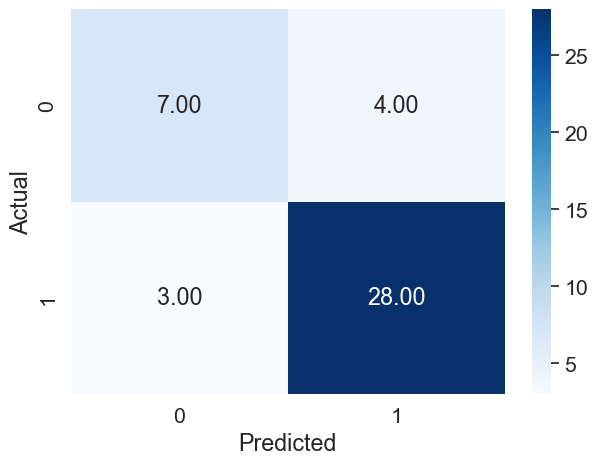

In [161]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data = confusion_matrix(y_test, pred_test)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt='.2f')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


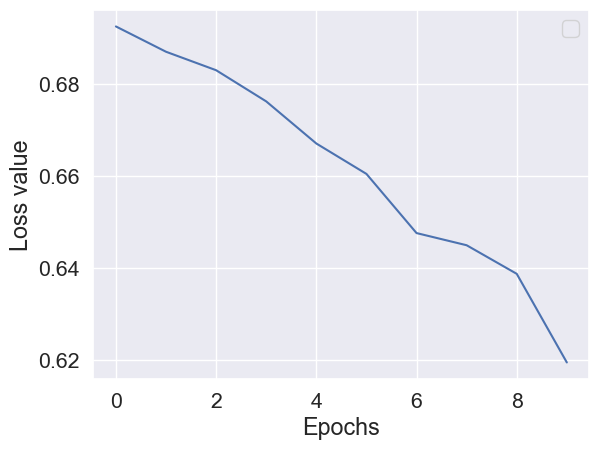

In [162]:
import matplotlib.pyplot as plt
loss_curve = hist.history['loss']
epoch_c = list(range(len(loss_curve)))
plt.xlabel('Epochs')
plt.ylabel('Loss value')
plt.plot(epoch_c,loss_curve)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


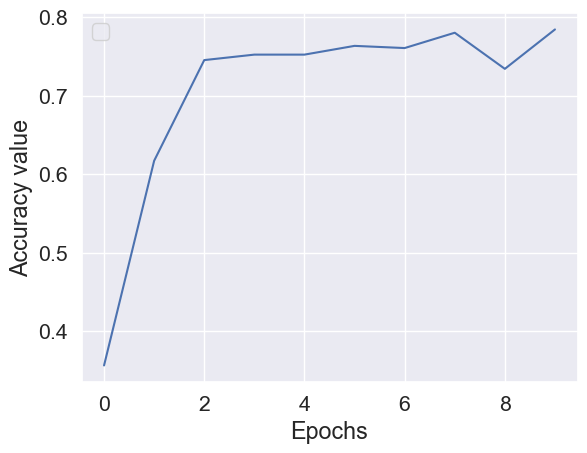

In [163]:
accuracy_curve = hist.history['accuracy']
epoch_c = list(range(len(loss_curve)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy value')
plt.plot(epoch_c,accuracy_curve)
plt.legend()
plt.show()

In [165]:


from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)



2/2 [==============================] - 0s 27ms/step


In [166]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

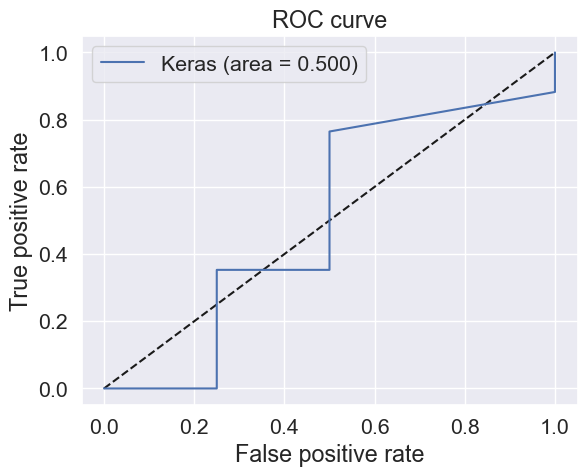

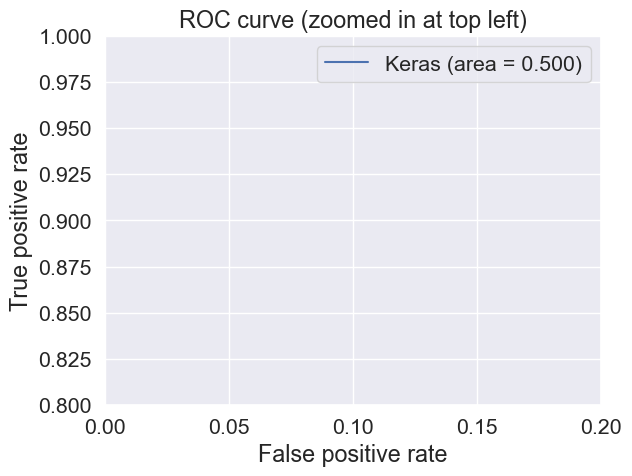

In [189]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [296]:
import keras.backend as K
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation,LSTM, SimpleRNN ,GRU , Bidirectional,Input ,Concatenate, Multiply,Lambda,Reshape
input_st  = Input(shape=(25,100))
lstm1 = GRU(200,input_shape=(25,100),activation='tanh',return_sequences=True)(input_st)
lstm2 = GRU(1,input_shape=(2.5,100),activation='tanh',return_sequences=True)(input_st)
print(lstm1.shape,' ',lstm2.shape)
lstm2 = Reshape((-1,))(lstm2)
lstm2 = Activation('softmax')(lstm2)
lstm2 = Reshape((-1,1))(lstm2)
mult = Multiply()([lstm1,lstm2])

add = Lambda(lambda x: K.sum(x,axis=1))(mult)
dense = Dense(100,activation='sigmoid')(add)
output = Dense(1,activation='relu')(dense)

model = Model(inputs=input_st, outputs=output)
print(model.summary())
print("abc")

(None, 25, 200)   (None, 25, 1)
Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_33 (InputLayer)       [(None, 25, 100)]            0         []                            
                                                                                                  
 gru_49 (GRU)                (None, 25, 1)                309       ['input_33[0][0]']            
                                                                                                  
 reshape_52 (Reshape)        (None, 25)                   0         ['gru_49[0][0]']              
                                                                                                  
 activation_26 (Activation)  (None, 25)                   0         ['reshape_52[0][0]']          
                                                           

In [297]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.compile(optimizer='Nadam',loss='binary_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train,y_train,validation_split=0.1,epochs=25, batch_size=512,callbacks=[early_stop])


Epoch 1/25
1/1 [==============================] - 6s 6s/step - loss: 3.1974 - accuracy: 0.2059 - val_loss: 2.0191 - val_accuracy: 0.3158
Epoch 2/25
1/1 [==============================] - 0s 180ms/step - loss: 2.3241 - accuracy: 0.2059 - val_loss: 1.8140 - val_accuracy: 0.3158
Epoch 3/25
1/1 [==============================] - 0s 221ms/step - loss: 2.0815 - accuracy: 0.2059 - val_loss: 1.6576 - val_accuracy: 0.3158
Epoch 4/25
1/1 [==============================] - 0s 134ms/step - loss: 1.8954 - accuracy: 0.2059 - val_loss: 1.5282 - val_accuracy: 0.3158
Epoch 5/25
1/1 [==============================] - 0s 127ms/step - loss: 1.7403 - accuracy: 0.2059 - val_loss: 1.4155 - val_accuracy: 0.3158
Epoch 6/25
1/1 [==============================] - 0s 124ms/step - loss: 1.6042 - accuracy: 0.2059 - val_loss: 1.3133 - val_accuracy: 0.3158
Epoch 7/25
1/1 [==============================] - 0s 148ms/step - loss: 1.4794 - accuracy: 0.2059 - val_loss: 1.2166 - val_accuracy: 0.3158
Epoch 8/25
1/1 [=======

In [167]:
model.evaluate(X_test, y_test, batch_size=64)
scores = model.evaluate(X_test, y_test)
print("Test acc: %.2f%%" % (scores[1]*100))
#print(scores)
model.evaluate(X_train, y_train, batch_size=1024)
scores = model.evaluate(X_train, y_train)
print("Train acc: %.2f%%" % (scores[1]*100))
#print(scores)

2/2 [==============================] - 0s 24ms/step - loss: 0.5894 - accuracy: 0.8333
Test acc: 83.33%
25/25 [==============================] - 1s 31ms/step - loss: 0.6191 - accuracy: 0.7607
Train acc: 76.07%
